# Statistical Reconstructions of Dynamic Evolution Operator

Numerical testing

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib notebook

## Benchmark: Hamilton Centre 

__SIMPLE TEST__: Single set of parameters

Define evolution operator

In [203]:
omega=1
dt=1

a_11 = numpy.cos(omega*dt)
a_12 = numpy.sin(omega*dt)
a_21 = -a_12
a_22 = a_11 

A = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [220]:
A

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

Define ensemble of initial conditions with _Uniform Polar Angular Distribution_

In [204]:
N = 100 # number of ICs
theta0 = 2*numpy.pi*numpy.random.rand(N) - numpy.pi # Initial conditions
r0 = 0.1*numpy.random.rand(N)+0.5
M = 1 # Number of iterations

# Ensemble of initial conditions
X0 = r0*numpy.cos(theta0)
Y0 = r0*numpy.sin(theta0)
R0 = numpy.array([X0, Y0])

Compute and plot 1-timestep trajectories

<IPython.core.display.Javascript object>


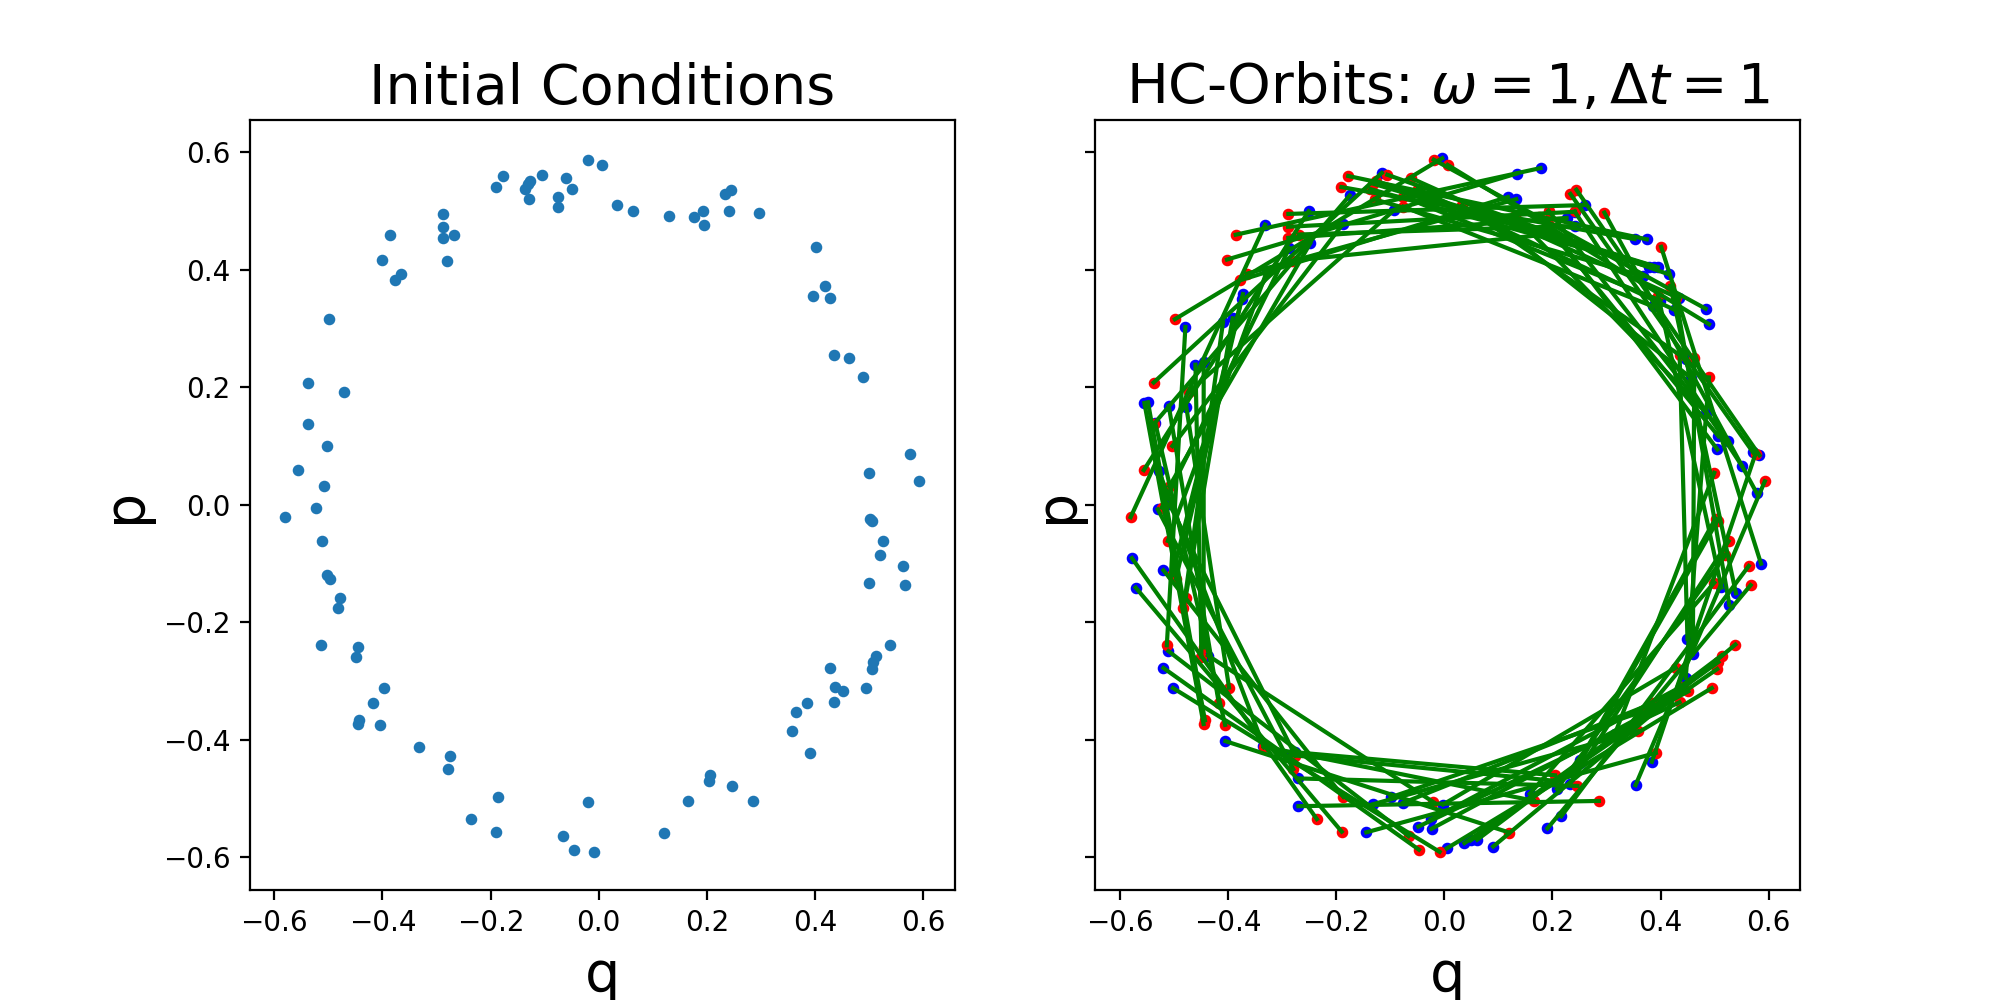

In [205]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*R0, s=10)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X1, Y1 = numpy.array([numpy.asarray(numpy.matmul(A,r0))[0] for r0 in R0.T]).T
R1 = numpy.array([X1, Y1])

ax[1].scatter(*R1,s=10, c='blue')
ax[1].scatter(*R0,s=10, c='red')
for i in range(N):
    plt.plot(*numpy.array([R0, R1]).T[i],c='green')

ax[1].set_title("HC-Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

Reconstruct Evolution Operator via Statistical estimation

In [206]:
A_hat_mean = numpy.matrix([[0,0],[0,0]])

for i in range(N):
    x0, y0 = R0.T[i]
    x1, y1 = R1.T[i]

    A_hat = numpy.matrix([
        [x1*x0, x1*y0],
        [y1*x0, y1*y0]
        ])/float(numpy.linalg.norm(R0.T[i])**2)
    A_hat_mean = A_hat_mean + A_hat
    
A_hat_mean = A_hat_mean/N

In [207]:
A_estimate = 2*A_hat_mean

Compare with _True Evolution Operator_

In [208]:
A_estimate

matrix([[ 0.471596  ,  0.83469046],
        [-0.84825151,  0.60900862]])

In [209]:
A

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

## Benchmark: Hamilton Saddle 

__SIMPLE TEST__: Single set of parameters

Define evolution operator

In [210]:
l=1
dt=0.1
a_11 = numpy.cosh(l*dt)
a_12 = numpy.sinh(l*dt)
a_21 = a_12
a_22 = a_11 

A = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [221]:
A

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

Define ensemble of initial conditions with _Uniform Polar Angular Distribution_

In [211]:
N = 1000 # number of ICs
theta0 = 2*numpy.pi*numpy.random.rand(N) - numpy.pi # Initial conditions
r0 = 0.1*numpy.random.rand(N)+0.5
M = 1 # Number of iterations

# Ensemble of initial conditions
X0 = r0*numpy.cos(theta0)
Y0 = r0*numpy.sin(theta0)
R0 = numpy.array([X0, Y0])

Compute and plot 1-timestep trajectories

<IPython.core.display.Javascript object>


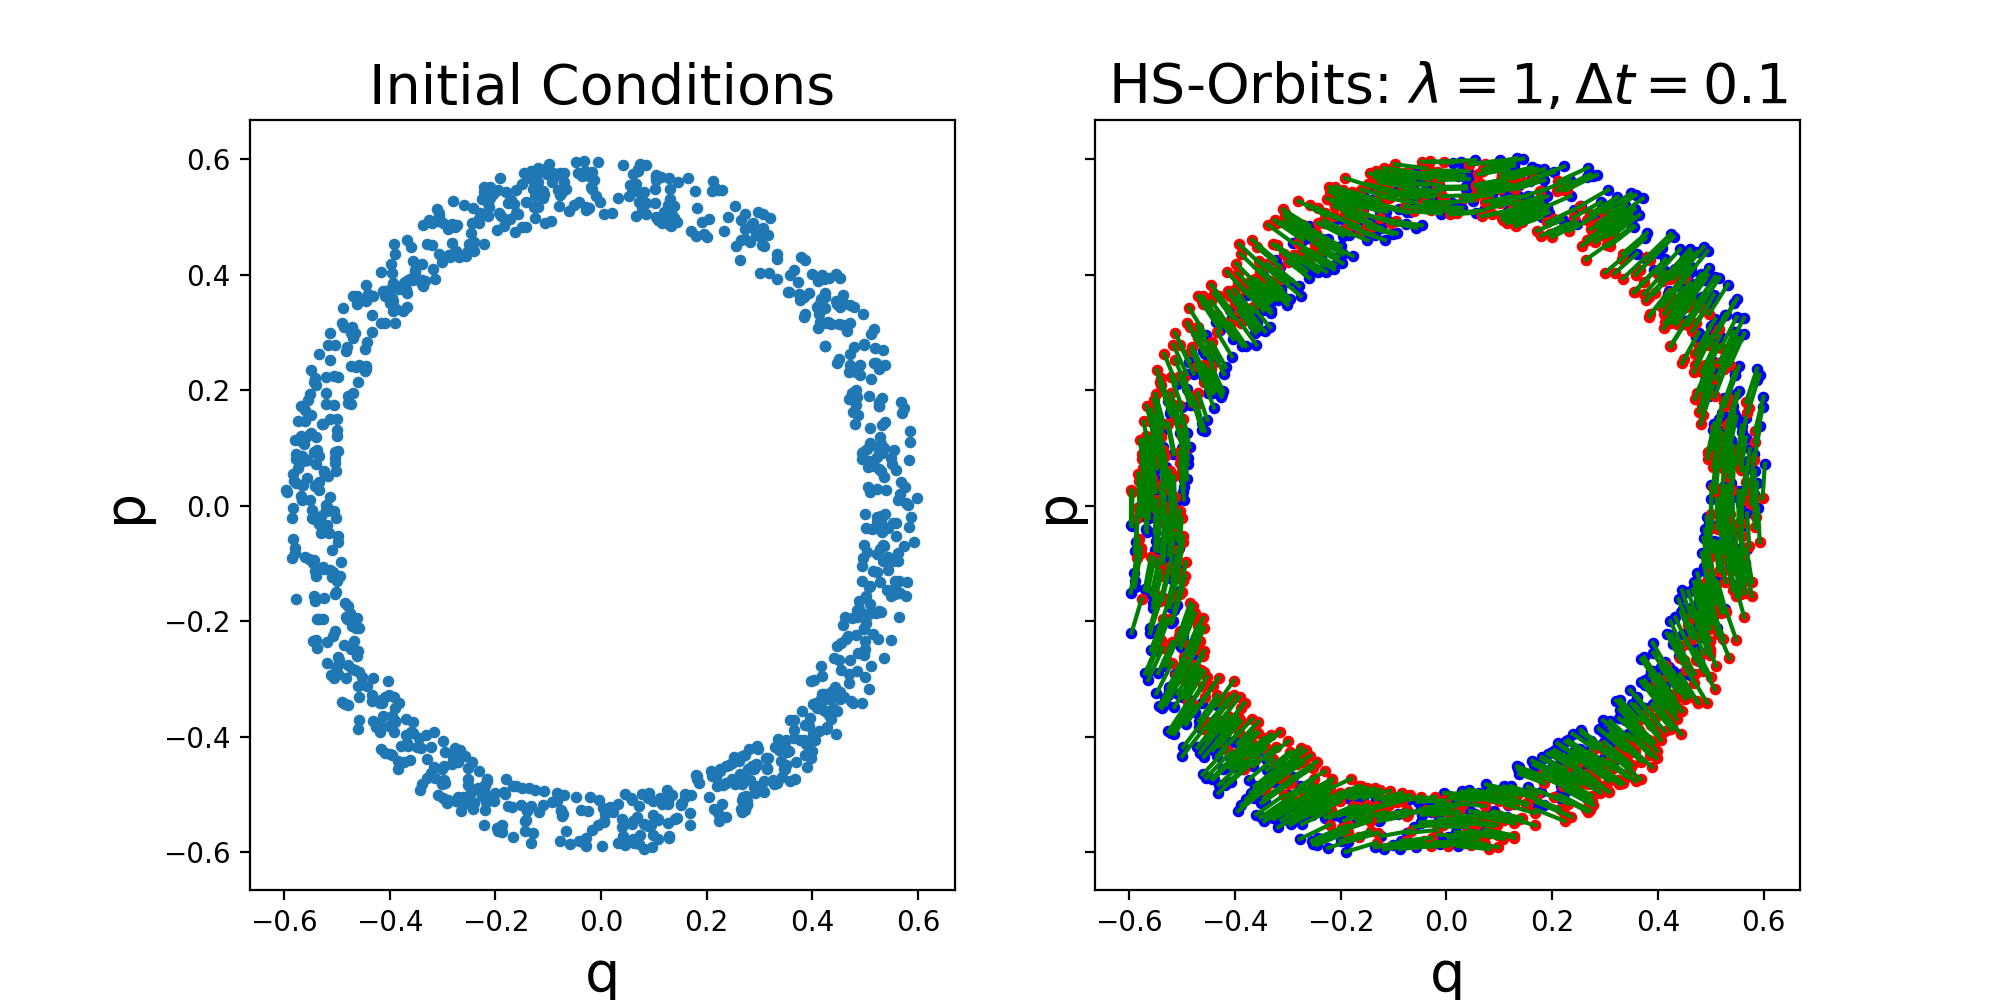

In [212]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*R0, s=10)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X1, Y1 = numpy.array([numpy.asarray(numpy.matmul(A,r0))[0] for r0 in R0.T]).T
R1 = numpy.array([X1, Y1])

ax[1].scatter(*R1,s=10, c='blue')
ax[1].scatter(*R0,s=10, c='red')
for i in range(N):
    plt.plot(*numpy.array([R0, R1]).T[i],c='green')

ax[1].set_title("HS-Orbits: $\lambda = 1, \Delta t = 0.1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

Reconstruct Evolution Operator via Ensemble

In [213]:
A_hat_mean = numpy.matrix([[0,0],[0,0]])

for i in range(N):
    x0, y0 = R0.T[i]
    x1, y1 = R1.T[i]

    A_hat = numpy.matrix([
        [x1*x0, x1*y0],
        [y1*x0, y1*y0]
        ])/float(numpy.linalg.norm(R0.T[i])**2)
    A_hat_mean = A_hat_mean + A_hat
    
A_hat_mean = A_hat_mean/N

In [214]:
A_estimate = 2*A_hat_mean

Compare with _True Evolution Operator_

In [215]:
A_estimate

matrix([[0.97055501, 0.05419575],
        [0.04830068, 1.0297021 ]])

In [200]:
A

matrix([[1.00500417, 0.10016675],
        [0.10016675, 1.00500417]])

## Assay: Non-uniform Polar Angular Sampling

__SIMPLE TEST__: Single set of parameters

We test reconstruction via an ensemble of initial conditions sampled via a uniform cartesian distribution 

Again, we define the true evolution operator

__Hamilton Centre__

Define evolution operator

In [252]:
omega=1
dt=1

a_11 = numpy.cos(omega*dt)
a_12 = numpy.sin(omega*dt)
a_21 = -a_12
a_22 = a_11 

A = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [253]:
A

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

Define ensemble of initial conditions with _Uniform Polar Angular Distribution_

In [254]:
N = 100 # number of ICs
R0 = 2*numpy.random.rand(2,N)-1 # Initial conditions

<IPython.core.display.Javascript object>


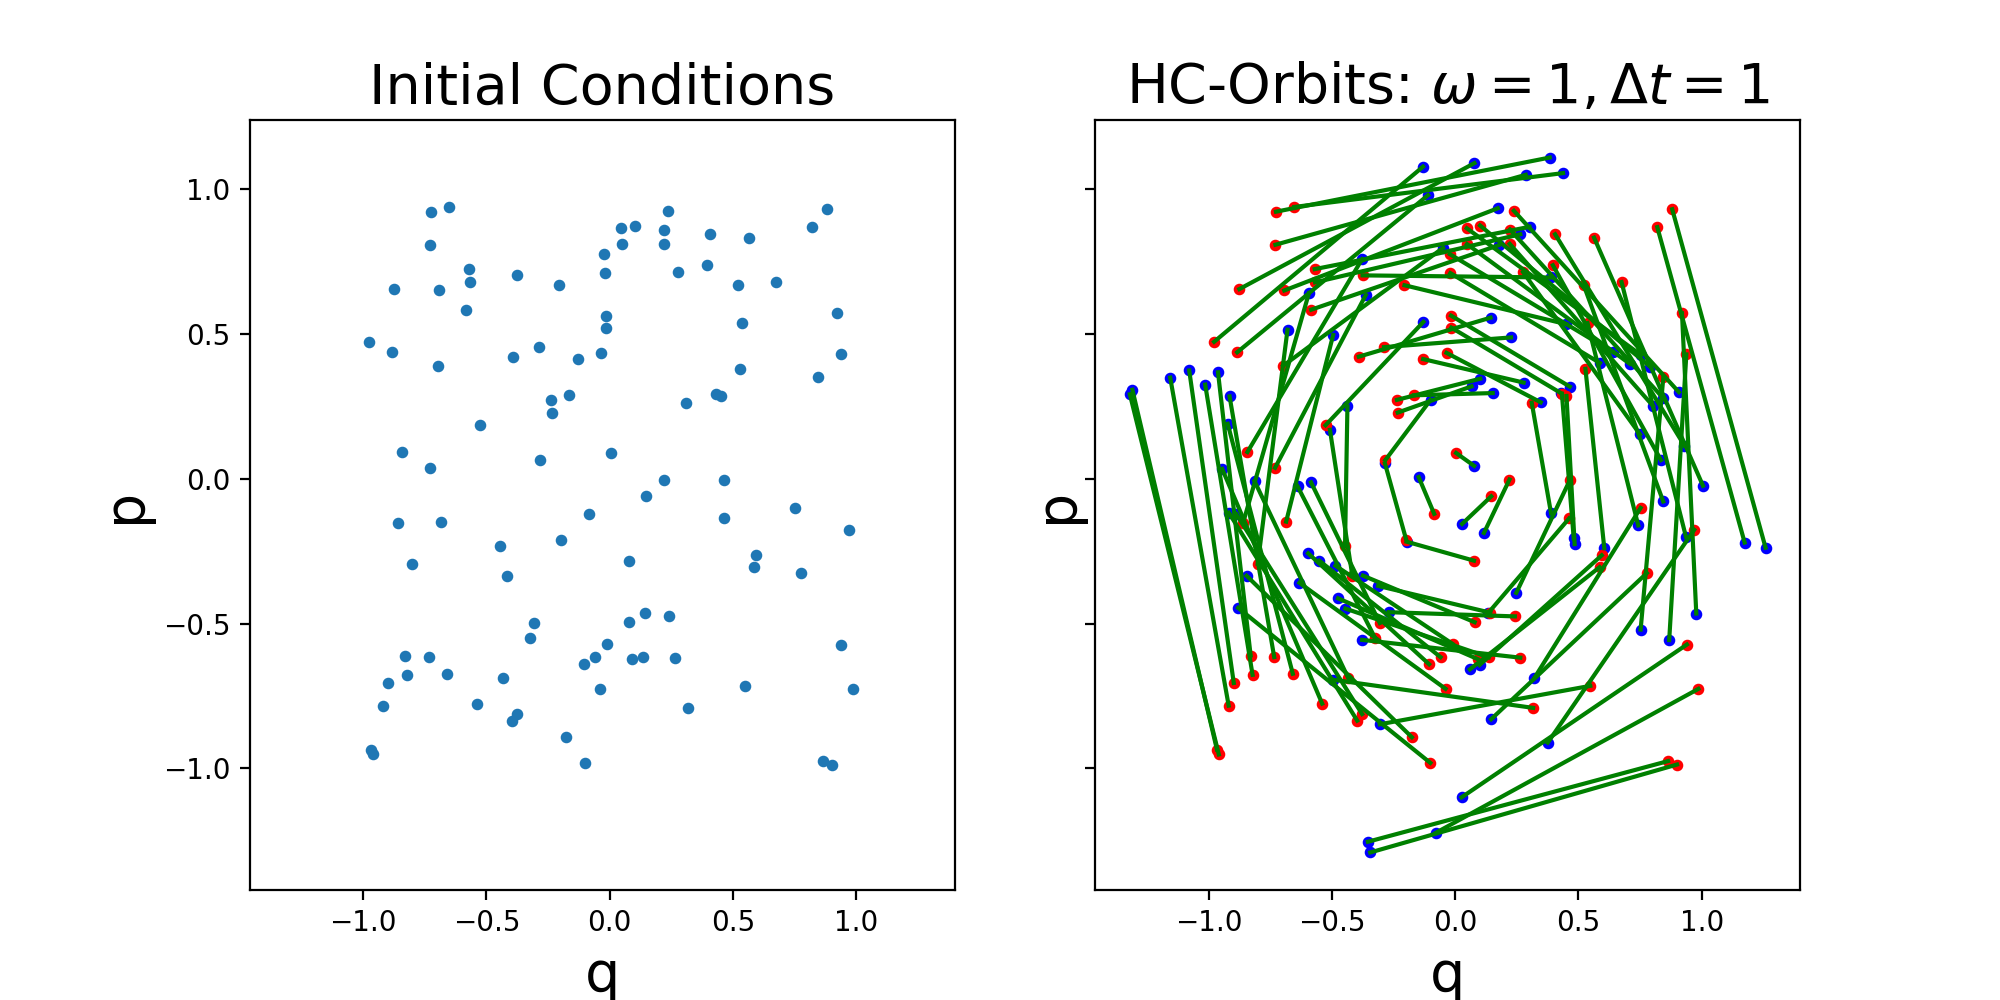

In [255]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*R0, s=10)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X1, Y1 = numpy.array([numpy.asarray(numpy.matmul(A,r0))[0] for r0 in R0.T]).T
R1 = numpy.array([X1, Y1])

ax[1].scatter(*R1,s=10, c='blue')
ax[1].scatter(*R0,s=10, c='red')
for i in range(N):
    plt.plot(*numpy.array([R0, R1]).T[i],c='green')

ax[1].set_title("HC-Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

Reconstruct Evolution Operator via Ensemble

In [256]:
A_hat_mean = numpy.matrix([[0,0],[0,0]])

for i in range(N):
    x0, y0 = R0.T[i]
    x1, y1 = R1.T[i]

    A_hat = numpy.matrix([
        [x1*x0, x1*y0],
        [y1*x0, y1*y0]
        ])/float(numpy.linalg.norm(R0.T[i])**2)
    A_hat_mean = A_hat_mean + A_hat
    
A_hat_mean = A_hat_mean/N

In [257]:
A_estimate = 2*A_hat_mean

Compare with _True Evolution Operator_

In [258]:
A_estimate

matrix([[ 0.49914093,  0.9742418 ],
        [-0.70870017,  0.58146368]])

In [259]:
A

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])